<h1 style = "font-size:3rem;color:DarkCyan">Train Classifier Model</h1>

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # for data importing
import sklearn # for training the model

In [4]:
# import the data
dataset = pd.read_csv(r'dataset.csv' , index_col=0)
dataset

,sf,mfcc,scon,zcr,rms,tg,label,filename
0,0.009266,-16.176497,20.150281,0.238694,0.042907,0.122623,0.0,clap00.wav
1,0.060073,-15.045925,20.220686,0.181085,0.091807,0.012034,0.0,clap01.wav
2,0.027080,-18.072697,20.386491,0.186275,0.060785,0.035546,0.0,clap02.wav
3,0.053378,-29.048000,23.282097,0.261476,0.059042,0.148375,0.0,clap03.wav
4,0.002444,-28.880560,21.106727,0.120479,0.012474,0.073228,0.0,clap04.wav
...,...,...,...,...,...,...,...,...
162,0.035142,-18.951557,21.133549,0.178874,0.022656,0.015246,3.0,snare_37.wav
163,0.022006,-19.046724,20.261291,0.146732,0.024521,0.038750,3.0,snare_38.wav
164,0.015060,-21.076578,22.140637,0.103575,0.019697,0.017071,3.0,snare_39.wav
165,0.021603,-20.621740,20.365652,0.131215,0.022071,0.027501,3.0,snare_40.wav


In [5]:
labels = np.array(dataset.label)
features = np.array([dataset.sf, dataset.mfcc, dataset.scon, dataset.zcr, dataset.rms, dataset.tg]).T
classes = ['clap','cymbal','kick','snare'] 

In [25]:
# split data into training and testing data
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
feat_train, feat_test, lab_train, lab_test = train_test_split(features, labels, test_size=0.3, random_state=52)


In [26]:
#learning the scaling transformation from the train data and applying it to both train and test set.

#creating scaling object
scaler = sklearn.preprocessing.StandardScaler()

#learning scaling from train set
scaler.fit(feat_train)

#applying scaling to both train and test set
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

<h2 style = "font-size:2rem;color:DarkCyan"> Training the ANN </h2>

In [43]:
#Import the classifier
from sklearn.neural_network import MLPClassifier

##Creating an instance of a MLP classifier
#and setting it some option (max mum epoch, verbose on, activation of neurons)
mlp = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=2000, activation='relu', verbose=True)

#train the model
mlp.fit(feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict = mlp.predict(feat_test)
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

Iteration 1, loss = 1.62157670
Iteration 2, loss = 1.61367638
Iteration 3, loss = 1.60581703
Iteration 4, loss = 1.59798609
Iteration 5, loss = 1.59021026
Iteration 6, loss = 1.58245864
Iteration 7, loss = 1.57476047
Iteration 8, loss = 1.56708964
Iteration 9, loss = 1.55948580
Iteration 10, loss = 1.55191891
Iteration 11, loss = 1.54437617
Iteration 12, loss = 1.53682257
Iteration 13, loss = 1.52930714
Iteration 14, loss = 1.52181784
Iteration 15, loss = 1.51437659
Iteration 16, loss = 1.50699257
Iteration 17, loss = 1.49964799
Iteration 18, loss = 1.49232462
Iteration 19, loss = 1.48508341
Iteration 20, loss = 1.47789978
Iteration 21, loss = 1.47078092
Iteration 22, loss = 1.46368606
Iteration 23, loss = 1.45663257
Iteration 24, loss = 1.44960013
Iteration 25, loss = 1.44254083
Iteration 26, loss = 1.43550382
Iteration 27, loss = 1.42850436
Iteration 28, loss = 1.42158613
Iteration 29, loss = 1.41470856
Iteration 30, loss = 1.40782710
Iteration 31, loss = 1.40095876
Iteration 32, los

Iteration 351, loss = 0.31027009
Iteration 352, loss = 0.30924394
Iteration 353, loss = 0.30822157
Iteration 354, loss = 0.30721280
Iteration 355, loss = 0.30620831
Iteration 356, loss = 0.30520804
Iteration 357, loss = 0.30421473
Iteration 358, loss = 0.30321359
Iteration 359, loss = 0.30220461
Iteration 360, loss = 0.30117065
Iteration 361, loss = 0.30013013
Iteration 362, loss = 0.29908325
Iteration 363, loss = 0.29807817
Iteration 364, loss = 0.29708550
Iteration 365, loss = 0.29606776
Iteration 366, loss = 0.29502321
Iteration 367, loss = 0.29396022
Iteration 368, loss = 0.29286522
Iteration 369, loss = 0.29174932
Iteration 370, loss = 0.29070129
Iteration 371, loss = 0.28970113
Iteration 372, loss = 0.28870590
Iteration 373, loss = 0.28771324
Iteration 374, loss = 0.28671668
Iteration 375, loss = 0.28571759
Iteration 376, loss = 0.28471126
Iteration 377, loss = 0.28370445
Iteration 378, loss = 0.28270060
Iteration 379, loss = 0.28169642
Iteration 380, loss = 0.28068899
Iteration 

Iteration 709, loss = 0.11086461
Iteration 710, loss = 0.11060075
Iteration 711, loss = 0.11033228
Iteration 712, loss = 0.11006894
Iteration 713, loss = 0.10980684
Iteration 714, loss = 0.10954400
Iteration 715, loss = 0.10928102
Iteration 716, loss = 0.10902122
Iteration 717, loss = 0.10875927
Iteration 718, loss = 0.10850096
Iteration 719, loss = 0.10824270
Iteration 720, loss = 0.10798377
Iteration 721, loss = 0.10773137
Iteration 722, loss = 0.10747628
Iteration 723, loss = 0.10721812
Iteration 724, loss = 0.10696733
Iteration 725, loss = 0.10671481
Iteration 726, loss = 0.10646314
Iteration 727, loss = 0.10621224
Iteration 728, loss = 0.10596110
Iteration 729, loss = 0.10571553
Iteration 730, loss = 0.10546220
Iteration 731, loss = 0.10521966
Iteration 732, loss = 0.10498062
Iteration 733, loss = 0.10474476
Iteration 734, loss = 0.10451150
Iteration 735, loss = 0.10427507
Iteration 736, loss = 0.10403622
Iteration 737, loss = 0.10379684
Iteration 738, loss = 0.10356038
Iteration 

Iteration 1068, loss = 0.05549363
Iteration 1069, loss = 0.05537081
Iteration 1070, loss = 0.05523665
Iteration 1071, loss = 0.05516010
Iteration 1072, loss = 0.05505647
Iteration 1073, loss = 0.05495686
Iteration 1074, loss = 0.05486275
Iteration 1075, loss = 0.05476439
Iteration 1076, loss = 0.05466501
Iteration 1077, loss = 0.05457583
Iteration 1078, loss = 0.05447801
Iteration 1079, loss = 0.05438322
Iteration 1080, loss = 0.05428924
Iteration 1081, loss = 0.05418069
Iteration 1082, loss = 0.05408657
Iteration 1083, loss = 0.05400282
Iteration 1084, loss = 0.05390478
Iteration 1085, loss = 0.05381866
Iteration 1086, loss = 0.05372711
Iteration 1087, loss = 0.05361773
Iteration 1088, loss = 0.05355197
Iteration 1089, loss = 0.05346748
Iteration 1090, loss = 0.05335698
Iteration 1091, loss = 0.05324668
Iteration 1092, loss = 0.05316291
Iteration 1093, loss = 0.05305651
Iteration 1094, loss = 0.05298968
Iteration 1095, loss = 0.05290186
Iteration 1096, loss = 0.05279692
Iteration 1097

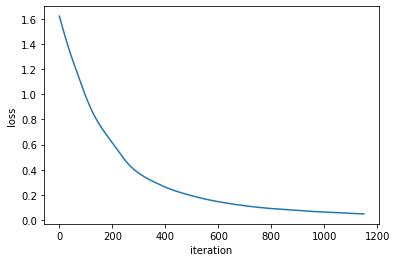

Number of mislabeled samples 3 out of 51
Accuracy: 0.9411764705882353
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        12
         1.0       1.00      0.94      0.97        16
         2.0       1.00      0.91      0.95        11
         3.0       0.92      0.92      0.92        12

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.95      0.94      0.94        51

confusion matrix
[[12  0  0  0]
 [ 0 15  0  1]
 [ 1  0 10  0]
 [ 1  0  0 11]]


In [45]:
#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))
print(sklearn.metrics.classification_report(lab_test, lab_predict))
print('confusion matrix')
print(sklearn.metrics.confusion_matrix(lab_test,lab_predict))

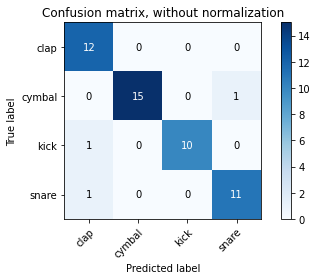

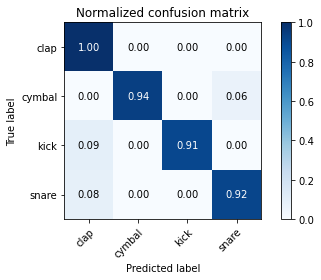

In [44]:

#defining a function for the confusion matrix display, from Stefano Fasciani
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[sklearn.utils.multiclass.unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       # print("Normalized confusion matrix")
    
    #print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

#setting the precision to two digits after the decimal point
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(lab_test, lab_predict, classes=classes,
                      title='Confusion matrix, without normalization')


# Plot normalized confusion matrix
plot_confusion_matrix(lab_test, lab_predict, classes=classes, normalize=True,
                      title='Normalized confusion matrix')


plt.show()